In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In here, we will explore what we can do with a basic neural net. This will apply to future architectures. Let's first create some simple functions.  

### Linear Functions

In [7]:
# create a linear map from R^100 to R^50 with bias 
linear1 = nn.Linear(
    in_features = 100, 
    out_features= 50, 
    bias = True
)

x = torch.randn(100) 
print(f"Shape of input x : {x.size()}")
y = linear1(x) 
print(f"Shape of output y : {y.size()}")

Shape of input x : torch.Size([100])
Shape of output y : torch.Size([50])


We can see the parameters of this function, through three ways: 
- Call the `.parameters()` method, which returns a generator of `torch.nn.parameter.Parameter` objects. 
- Call the `.named_parameters()` method, which returns a generator of tuples of type (`str`, `torch.nn.parameter.Parameter`) 
- Call the `.state_dict()` method, which returns a generater of all model states. As of this point, the state dict is equivalent, but it is more general and gives more information for more complicated models. 

In [17]:
print("Just calling Parameters ========")
for param in linear1.parameters(): 
    print(type(param))
    print(param) 

print("Calling Named Parameters ========")
for name, param in linear1.named_parameters(): 
    print(name)
    print(param) 

print("Calling Model State Dict ========")
for param in linear1.state_dict(): 
    print(param) 
    print(linear1.state_dict()[param])
    


Just calling Parameters ========
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[ 0.0254,  0.0228, -0.0663,  ..., -0.0025,  0.0983, -0.0226],
        [ 0.0070,  0.0402,  0.0142,  ..., -0.0476, -0.0482,  0.0760],
        [-0.0830, -0.0249, -0.0068,  ...,  0.0219,  0.0149, -0.0563],
        ...,
        [ 0.0198, -0.0488, -0.0460,  ...,  0.0835,  0.0892,  0.0963],
        [ 0.0608,  0.0494, -0.0246,  ..., -0.0522, -0.0519,  0.0348],
        [-0.0501,  0.0029,  0.0696,  ..., -0.0722,  0.0799,  0.0588]],
       requires_grad=True)
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.0206, -0.0592, -0.0231,  0.0037, -0.0225,  0.0966,  0.0424, -0.0877,
        -0.0550, -0.0859,  0.0200,  0.0045,  0.0856,  0.0892,  0.0064,  0.0447,
        -0.0982, -0.0598,  0.0698,  0.0447, -0.0645, -0.0610, -0.0348, -0.0928,
         0.0738, -0.0765, -0.0180, -0.0069,  0.0815,  0.0230, -0.0525,  0.0228,
         0.0038, -0.0225,  0.0542,  0.0087,  0.0344,  0.0931, -0

The most important attributes and methods in parameter objects that you will deal with is the following : 
- `.data` attribute, which gives you the actual parameter matrix. 
- `.requires_grad` attribute, which tells you whether the parameter is storing gradients. 
- `.`

You can also filter using the state_dict or the named parameters to find parameters that are only weights or only biases, etc. 

In [18]:
for name, param in linear1.named_parameters(): 
    if 'bias' not in name: 
        print(param.requires_grad)
        print(param.data) 

True
tensor([[ 0.0254,  0.0228, -0.0663,  ..., -0.0025,  0.0983, -0.0226],
        [ 0.0070,  0.0402,  0.0142,  ..., -0.0476, -0.0482,  0.0760],
        [-0.0830, -0.0249, -0.0068,  ...,  0.0219,  0.0149, -0.0563],
        ...,
        [ 0.0198, -0.0488, -0.0460,  ...,  0.0835,  0.0892,  0.0963],
        [ 0.0608,  0.0494, -0.0246,  ..., -0.0522, -0.0519,  0.0348],
        [-0.0501,  0.0029,  0.0696,  ..., -0.0722,  0.0799,  0.0588]])


To see how they are initialized, let's make a histogram of the parameters, which shows us that the parameters are uniformly distributed. 

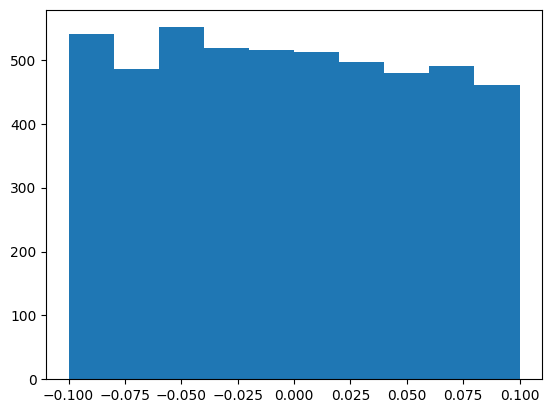

In [13]:
param_list = [] 

for param in linear1.parameters(): 
    # first flatten it  and then put it into a list
    param_list += param.reshape(-1).tolist()
    
plt.hist(param_list)
plt.show()  

Say that we want to have a custom mapping, say the identity and adding a vector of all $2$'s onto our input vector. We can modify this mapping by iterating through the parameters and replacing it with what we want. 

In [30]:
x = torch.ones(100)

linear2 = nn.Linear(100, 50, bias=True)
print("Original Weights ========")
for name, param in linear2.named_parameters(): 
    print(name)
    print(param)
print(f"\nEvaluted : {linear2(x)}")
print("=========================")


new_weight = torch.eye(n=50, m=100)
new_bias = 2 * torch.ones(50)

for name, param in linear2.named_parameters(): 
    if "weight" in name: 
        param.data = new_weight 
    elif "bias" in name: 
        param.data = new_bias 
    else: 
        pass 

print("Updated Weights =========")    
# now look at the update module 
for name, param in linear2.named_parameters(): 
    print(name)
    print(param)
print(f"\nEvaluated : {linear2(x)}")
print("=========================")

Original Weights ========
weight
Parameter containing:
tensor([[ 0.0299, -0.0558, -0.0585,  ..., -0.0816, -0.0070,  0.0219],
        [ 0.0929,  0.0220,  0.0127,  ...,  0.0034,  0.0754, -0.0020],
        [-0.0011,  0.0257,  0.0006,  ...,  0.0357, -0.0484,  0.0411],
        ...,
        [ 0.0917,  0.0243,  0.0226,  ...,  0.0048,  0.0701,  0.0683],
        [-0.0701,  0.0980, -0.0791,  ..., -0.0411,  0.0728,  0.0270],
        [-0.0212,  0.0067, -0.0193,  ..., -0.0230, -0.0925,  0.0084]],
       requires_grad=True)
bias
Parameter containing:
tensor([ 0.0995, -0.0656,  0.0001, -0.0185, -0.0895,  0.0707, -0.0920,  0.0730,
        -0.0846,  0.0945,  0.0118,  0.0152,  0.0142,  0.0434,  0.0172,  0.0894,
         0.0638, -0.0862, -0.0055, -0.0566,  0.0945, -0.0462, -0.0587, -0.0815,
         0.0314, -0.0407,  0.0321, -0.0175, -0.0699, -0.0792,  0.0049, -0.0699,
        -0.0688, -0.0340, -0.0549,  0.0776,  0.0769,  0.0975,  0.0257,  0.0721,
         0.0225, -0.0197,  0.0704,  0.0628, -0.0495,  0.0

### Activation Functions

Now let's talk about different types of activations functions. These have no parameters

In [31]:
relu = nn.ReLU() 
sigmoid = nn.Sigmoid() 

x = 10 * torch.randn(5) 
print(x) 
print(relu(x)) 
print(sigmoid(x))

tensor([  0.8653,  15.9285,  -1.4185,  -9.7655, -10.4387])
tensor([ 0.8653, 15.9285,  0.0000,  0.0000,  0.0000])
tensor([7.0378e-01, 1.0000e+00, 1.9490e-01, 5.7395e-05, 2.9278e-05])


### Sequential

The sequential class allows us to create compositions of functions easily. For example, we can make a simple sequential module by taking a linear map, plus a relu, plus a linear, plus a sigmoid. 

In [38]:
sequential = nn.Sequential(
    nn.Linear(30, 20), 
    nn.ReLU(), 
    nn.Linear(20, 10), 
    nn.Sigmoid()
)

x = torch.randn(30) 
print(sequential(x))

tensor([0.6161, 0.5707, 0.5686, 0.4921, 0.4395, 0.4861, 0.4634, 0.4874, 0.5312,
        0.5061], grad_fn=<SigmoidBackward0>)


Now if we take a look through its parameters, we can see that each unique parameter is indexed properly, so we can update them accordingly. 

In [39]:
for name, param in sequential.named_parameters(): 
    print(name) 

0.weight
0.bias
2.weight
2.bias


In [42]:
new_params = {
    "0.weight" : torch.eye(20, 30, dtype=torch.float32), 
    "0.bias" : torch.ones(20, dtype=torch.float32) * -2, 
    "2.weight" : torch.ones(10, 20, dtype=torch.float32), 
    "2.bias" : torch.arange(10, dtype=torch.float32)
}

for name, param in sequential.named_parameters(): 
    param.data = new_params[name] 
    
for name, param in sequential.named_parameters(): 
    print(param) 

Parameter containing:
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     

### Neural Networks

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()

Now we can explore its layers.

In [44]:
for name, param in model.named_parameters(): 
    print(name, param.shape)

linear_relu_stack.0.weight torch.Size([512, 3072])
linear_relu_stack.0.bias torch.Size([512])
linear_relu_stack.2.weight torch.Size([512, 512])
linear_relu_stack.2.bias torch.Size([512])
linear_relu_stack.4.weight torch.Size([10, 512])
linear_relu_stack.4.bias torch.Size([10])
